UNIVERSIDAD DE LA HABANA - MATCOM

Ciencia de la Computación

Estadística - Proyecto Final

Curso 2025-2026



ANÁLISIS ESTADÍSTICO DE JUICIOS CIVILES FEDERALES EN ESTADOS UNIDOS (2010-2024)

Autores:
- Ronald Alfonso Pérez
- Abraham Rey Sánchez Amador

Institución: Facultad de Matemática y Computación, Universidad de La Habana


## 1. INTRODUCCIÓN



CONTEXTO DEL PROBLEMA

El sistema judicial civil de Estados Unidos procesa anualmente cientos de miles 
de casos que abarcan disputas contractuales, negligencia médica, derechos civiles, 
propiedad intelectual y litigios corporativos. Estos casos no solo determinan 
compensaciones económicas significativas, sino que también establecen precedentes 
legales y reflejan patrones socioeconómicos del país.

El análisis cuantitativo de datos judiciales permite identificar factores que 
influyen en los resultados de los juicios, revelar disparidades sistémicas y 
proporcionar evidencia empírica para reformas procesales. Sin embargo, la 
complejidad de estos datos —con múltiples jurisdicciones, tipos de casos y 
métodos de resolución— requiere técnicas estadísticas avanzadas para extraer 
conclusiones válidas.

RELEVANCIA DEL ESTUDIO

Este proyecto aborda tres dimensiones fundamentales del litigio civil:

1. Factores Económicos: ¿Qué variables predicen mejor las compensaciones otorgadas?
2. Estructura Latente: ¿Existen patrones ocultos que caracterizan perfiles de casos?
3. Disparidades Procesales: ¿El tipo de juicio afecta sistemáticamente los montos?

Comprender estos aspectos tiene implicaciones prácticas para:
- Abogados (estrategias de litigio y estimación de costos)
- Jueces (gestión eficiente de casos)
- Legisladores (diseño de políticas judiciales basadas en evidencia)
- Académicos (teoría empírica del derecho)

OBJETIVOS DEL PROYECTO

1. Realizar un análisis exploratorio exhaustivo de los datos judiciales
2. Aplicar técnicas estadísticas avanzadas (regresión, PCA, pruebas de hipótesis)
3. Identificar patrones significativos en los resultados de litigios civiles
4. Proporcionar conclusiones fundamentadas en evidencia estadística
5. Evaluar críticamente las limitaciones metodológicas del estudio


## 2. PREGUNTAS DE INVESTIGACIÓN



El presente estudio busca responder tres preguntas fundamentales sobre el 
comportamiento de los juicios civiles federales en Estados Unidos durante el 
período 2010-2024:

PREGUNTA 1: Modelado Predictivo de Compensaciones
¿Qué factores (tipo de caso, duración, honorarios legales, jurisdicción) explican 
mejor el monto económico otorgado en juicios civiles federales?

Técnica estadística: Regresión Lineal Múltiple
Justificación: Permite cuantificar la contribución individual de cada variable 
predictora al monto otorgado, controlando por confusores.

PREGUNTA 2: Caracterización de Perfiles de Casos
¿Existen patrones latentes que permitan caracterizar distintos perfiles de 
juicios civiles a partir de variables económicas y temporales, independientemente 
del resultado del juicio?

Técnica estadística: Análisis de Componentes Principales (PCA)
Justificación: Reduce la dimensionalidad del espacio de variables y revela 
estructuras subyacentes no evidentes en el análisis univariado.

PREGUNTA 3: Disparidades por Tipo de Juicio
¿Existen diferencias estadísticamente significativas en los montos otorgados 
según el tipo de juicio (Jury Trial vs Bench Trial) y cómo han variado estas 
diferencias en el período 2014-2024?

Técnica estadística: Prueba de Mann-Whitney U (no paramétrica)
Justificación: Los montos otorgados presentan distribuciones asimétricas con 
valores extremos, violando supuestos de normalidad requeridos por pruebas 
paramétricas.


## 3. IMPORTACIÓN DE LIBRERÍAS



Manipulación y análisis de datos


In [1]:
import pandas as pd
import numpy as np


Visualización


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


Configuración de visualizaciones


In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


Configuración de opciones de pandas


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)


Pruebas estadísticas


In [5]:
from scipy import stats
from scipy.stats import mannwhitneyu 

Modelado


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
)


Configuración de reproducibilidad


In [7]:
np.random.seed(42)


Suprimir advertencias innecesarias


In [8]:
import warnings
warnings.filterwarnings('ignore')

print("✓ Todas las librerías importadas correctamente")
print(f"✓ Versión de pandas: {pd.__version__}")
print(f"✓ Versión de numpy: {np.__version__}")


✓ Todas las librerías importadas correctamente
✓ Versión de pandas: 2.3.3
✓ Versión de numpy: 2.4.0


## 4. DESCRIPCIÓN DEL DATASET



FUENTE DE DATOS

Dataset: Federal Civil Litigation Cases (2010-2024)
Fuente: Kaggle
Período temporal: 2010-2024 (14 años)
Unidad de análisis: Caso civil federal resuelto

DESCRIPCIÓN DE VARIABLES

El dataset contiene información detallada sobre casos civiles federales en EE.UU.,
organizados en las siguientes categorías:

IDENTIFICACIÓN Y CONTEXTO:
- Case_ID: Identificador único del caso
- Filing_Year: Año de presentación del caso (2010-2024)
- Circuit: Circuito judicial federal (First through Eleventh, D.C., Federal)
- District: Distrito judicial específico dentro del circuito

CARACTERÍSTICAS DEL CASO:
- Case_Type: Tipo de litigio civil (Tort, Contract, Employment, IP, etc.)
- Plaintiff_Type: Tipo de demandante (Individual, Corporation, Government, etc.)
- Defendant_Type: Tipo de demandado (Individual, Corporation, Government, etc.)
- Plaintiff_Counsel: Firma legal representante del demandante
- Defendant_Counsel: Firma legal representante del demandado
- Presiding_Judge: Juez que preside el caso

RESOLUCIÓN Y RESULTADOS:
- Outcome: Resultado del caso (Plaintiff Verdict, Defendant Verdict, Settled, Dismissed)
- Resolution_Method: Método de resolución (Jury Trial, Bench Trial, Settlement, etc.)
- Award_Amount: Monto otorgado en dólares (0 si no hay compensación)
- Appeal_Filed: Si se presentó apelación (Yes/No)

VARIABLES ECONÓMICAS Y TEMPORALES:
- Plaintiff_Legal_Fees: Honorarios legales del demandante (USD)
- Defendant_Legal_Fees: Honorarios legales del demandado (USD)
- Days_to_Resolution: Días desde presentación hasta resolución

NOTA IMPORTANTE SOBRE INFLACIÓN:
Los montos monetarios (Award_Amount, Legal_Fees) abarcan 14 años (2010-2024).
Para hacer comparaciones válidas entre años, todos los valores monetarios serán
ajustados a dólares constantes de 2024 utilizando el Índice de Precios al
Consumidor (CPI) de la Oficina de Estadísticas Laborales de EE.UU.


## 5. CARGA Y EXPLORACIÓN INICIAL DE DATOS



Cargar el dataset


In [9]:
print("="*80)
print("CARGANDO DATASET...")
print("="*80)

df = pd.read_csv('federal_civil_litigation.csv')

print(f"\n✓ Dataset cargado exitosamente")
print(f"✓ Dimensiones: {df.shape[0]:,} casos × {df.shape[1]} variables")
print(f"✓ Período: {df['Filing_Year'].min()} - {df['Filing_Year'].max()}")


CARGANDO DATASET...

✓ Dataset cargado exitosamente
✓ Dimensiones: 65,000 casos × 17 variables
✓ Período: 2010 - 2024


Primeras observaciones


In [10]:
print("\n" + "="*80)
print("PRIMERAS 5 OBSERVACIONES")
print("="*80)
print(df.head())



PRIMERAS 5 OBSERVACIONES
         Case_ID  Filing_Year         Circuit                       District  \
0  CV-2011-92719         2011   First Circuit              District of Maine   
1  CV-2022-63354         2022  Fourth Circuit   Eastern District of Virginia   
2  CV-2022-24322         2022  Fourth Circuit   Western District of Virginia   
3  CV-2023-11934         2023  Second Circuit   Eastern District of New York   
4  CV-2022-69638         2022   Fifth Circuit  Western District of Louisiana   

                               Case_Type             Plaintiff_Type  \
0               Tort - Product Liability                 Individual   
1             Tort - Medical Malpractice                Labor Union   
2  Employment Discrimination - Title VII  Class Action - Securities   
3                  Civil Rights - Voting    Non-Profit Organization   
4                 Bankruptcy - Adversary            Trust or Estate   

                Defendant_Type    Plaintiff_Counsel       Defendan

Información general del dataset


In [11]:
print("\n" + "="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(df.info())



INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Case_ID               65000 non-null  object
 1   Filing_Year           65000 non-null  int64 
 2   Circuit               65000 non-null  object
 3   District              65000 non-null  object
 4   Case_Type             65000 non-null  object
 5   Plaintiff_Type        65000 non-null  object
 6   Defendant_Type        65000 non-null  object
 7   Plaintiff_Counsel     65000 non-null  object
 8   Defendant_Counsel     65000 non-null  object
 9   Presiding_Judge       65000 non-null  object
 10  Outcome               65000 non-null  object
 11  Resolution_Method     65000 non-null  object
 12  Award_Amount          65000 non-null  int64 
 13  Plaintiff_Legal_Fees  65000 non-null  int64 
 14  Defendant_Legal_Fees  65000 non-null  int64 
 15  Day

Estadísticos descriptivos de variables numéricas


In [12]:
print("\n" + "="*80)
print("ESTADÍSTICOS DESCRIPTIVOS - VARIABLES NUMÉRICAS")
print("="*80)
print(df.describe())



ESTADÍSTICOS DESCRIPTIVOS - VARIABLES NUMÉRICAS
       Filing_Year  Award_Amount  Plaintiff_Legal_Fees  Defendant_Legal_Fees  \
count     65000.00      6.50e+04              65000.00              65000.00   
mean       2017.01      1.60e+06             269716.97             355101.63   
std           4.32      4.47e+06             220207.04             295241.43   
min        2010.00      0.00e+00               5009.00              10011.00   
25%        2013.00      0.00e+00              73768.00              94969.75   
50%        2017.00      0.00e+00             201354.00             252457.50   
75%        2021.00      1.80e+06             445386.00             590447.50   
max        2024.00      5.00e+07             749943.00             999991.00   

       Days_to_Resolution  
count            65000.00  
mean               734.83  
std                489.83  
min                 45.00  
25%                331.00  
50%                614.00  
75%               1113.00  
max   

Verificar valores duplicados


In [13]:
duplicados = df.duplicated().sum()
print(f"\n✓ Casos duplicados encontrados: {duplicados}")

if duplicados > 0:
    print(f"  → Eliminando {duplicados} casos duplicados...")
    df = df.drop_duplicates()
    print(f"  ✓ Dataset limpio: {df.shape[0]:,} casos únicos")



✓ Casos duplicados encontrados: 0


Verificar valores faltantes


In [14]:
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

missing_df = pd.DataFrame({
    'Variable': valores_faltantes.index,
    'Valores Faltantes': valores_faltantes.values,
    'Porcentaje (%)': porcentaje_faltantes.values
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    'Valores Faltantes', 
    ascending=False
)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No se encontraron valores faltantes en el dataset")



ANÁLISIS DE VALORES FALTANTES
✓ No se encontraron valores faltantes en el dataset


Distribución de variables categóricas clave


In [15]:
print("\n" + "="*80)
print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE")
print("="*80)

print("\n1. DISTRIBUCIÓN POR AÑO:")
print(df['Filing_Year'].value_counts().sort_index())

print("\n2. DISTRIBUCIÓN POR TIPO DE CASO (Top 10):")
print(df['Case_Type'].value_counts().head(10))

print("\n3. DISTRIBUCIÓN POR RESULTADO DEL CASO:")
print(df['Outcome'].value_counts())

print("\n4. DISTRIBUCIÓN POR MÉTODO DE RESOLUCIÓN:")
print(df['Resolution_Method'].value_counts())

print("\n5. DISTRIBUCIÓN POR CIRCUITO (Top 5):")
print(df['Circuit'].value_counts().head(5))



DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE

1. DISTRIBUCIÓN POR AÑO:
Filing_Year
2010    4298
2011    4367
2012    4401
2013    4252
2014    4241
2015    4263
2016    4361
2017    4277
2018    4353
2019    4377
2020    4390
2021    4474
2022    4328
2023    4326
2024    4292
Name: count, dtype: int64

2. DISTRIBUCIÓN POR TIPO DE CASO (Top 10):
Case_Type
Intellectual Property - Patent           2918
Securities Fraud - 10b-5                 2904
Employment Discrimination - Title VII    2891
Civil Rights - Voting                    2888
Tort - Medical Malpractice               2868
Employment Discrimination - ADEA         2863
Civil Rights - Section 1983              2856
Antitrust - Sherman Act                  2855
Intellectual Property - Trademark        2852
Real Property - Foreclosure              2839
Name: count, dtype: int64

3. DISTRIBUCIÓN POR RESULTADO DEL CASO:
Outcome
Defendant Verdict                20174
Plaintiff Verdict                15455
Settled Before Trial         

Resumen de variables monetarias (antes del ajuste por inflación)


In [16]:
print("\n" + "="*80)
print("RESUMEN DE VARIABLES MONETARIAS (Dólares nominales)")
print("="*80)

monetary_vars = ['Award_Amount', 'Plaintiff_Legal_Fees', 'Defendant_Legal_Fees']

for var in monetary_vars:
    print(f"\n{var}:")
    print(f"  - Media: ${df[var].mean():,.2f}")
    print(f"  - Mediana: ${df[var].median():,.2f}")
    print(f"  - Mínimo: ${df[var].min():,.2f}")
    print(f"  - Máximo: ${df[var].max():,.2f}")
    print(f"  - Casos con valor > 0: {(df[var] > 0).sum():,} ({(df[var] > 0).mean()*100:.1f}%)")

print("\n" + "="*80)
print("✓ CARGA Y EXPLORACIÓN INICIAL COMPLETADA")
print("="*80)



RESUMEN DE VARIABLES MONETARIAS (Dólares nominales)

Award_Amount:
  - Media: $1,599,618.81
  - Mediana: $0.00
  - Mínimo: $0.00
  - Máximo: $49,994,456.00
  - Casos con valor > 0: 31,831 (49.0%)

Plaintiff_Legal_Fees:
  - Media: $269,716.97
  - Mediana: $201,354.00
  - Mínimo: $5,009.00
  - Máximo: $749,943.00
  - Casos con valor > 0: 65,000 (100.0%)

Defendant_Legal_Fees:
  - Media: $355,101.63
  - Mediana: $252,457.50
  - Mínimo: $10,011.00
  - Máximo: $999,991.00
  - Casos con valor > 0: 65,000 (100.0%)

✓ CARGA Y EXPLORACIÓN INICIAL COMPLETADA


## 6. ANÁLISIS EXPLORATORIO DE DATOS (EDA)


In [17]:

print("\n" + "="*80)
print("INICIANDO ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*80)



INICIANDO ANÁLISIS EXPLORATORIO DE DATOS (EDA)


------------------------------------------------------------------------------
6.1 DISTRIBUCIONES DE VARIABLES NUMÉRICAS
------------------------------------------------------------------------------


In [18]:
print("\n[1/7] Analizando distribuciones de variables numéricas...")



[1/7] Analizando distribuciones de variables numéricas...


Crear figura con subplots para las principales variables numéricas


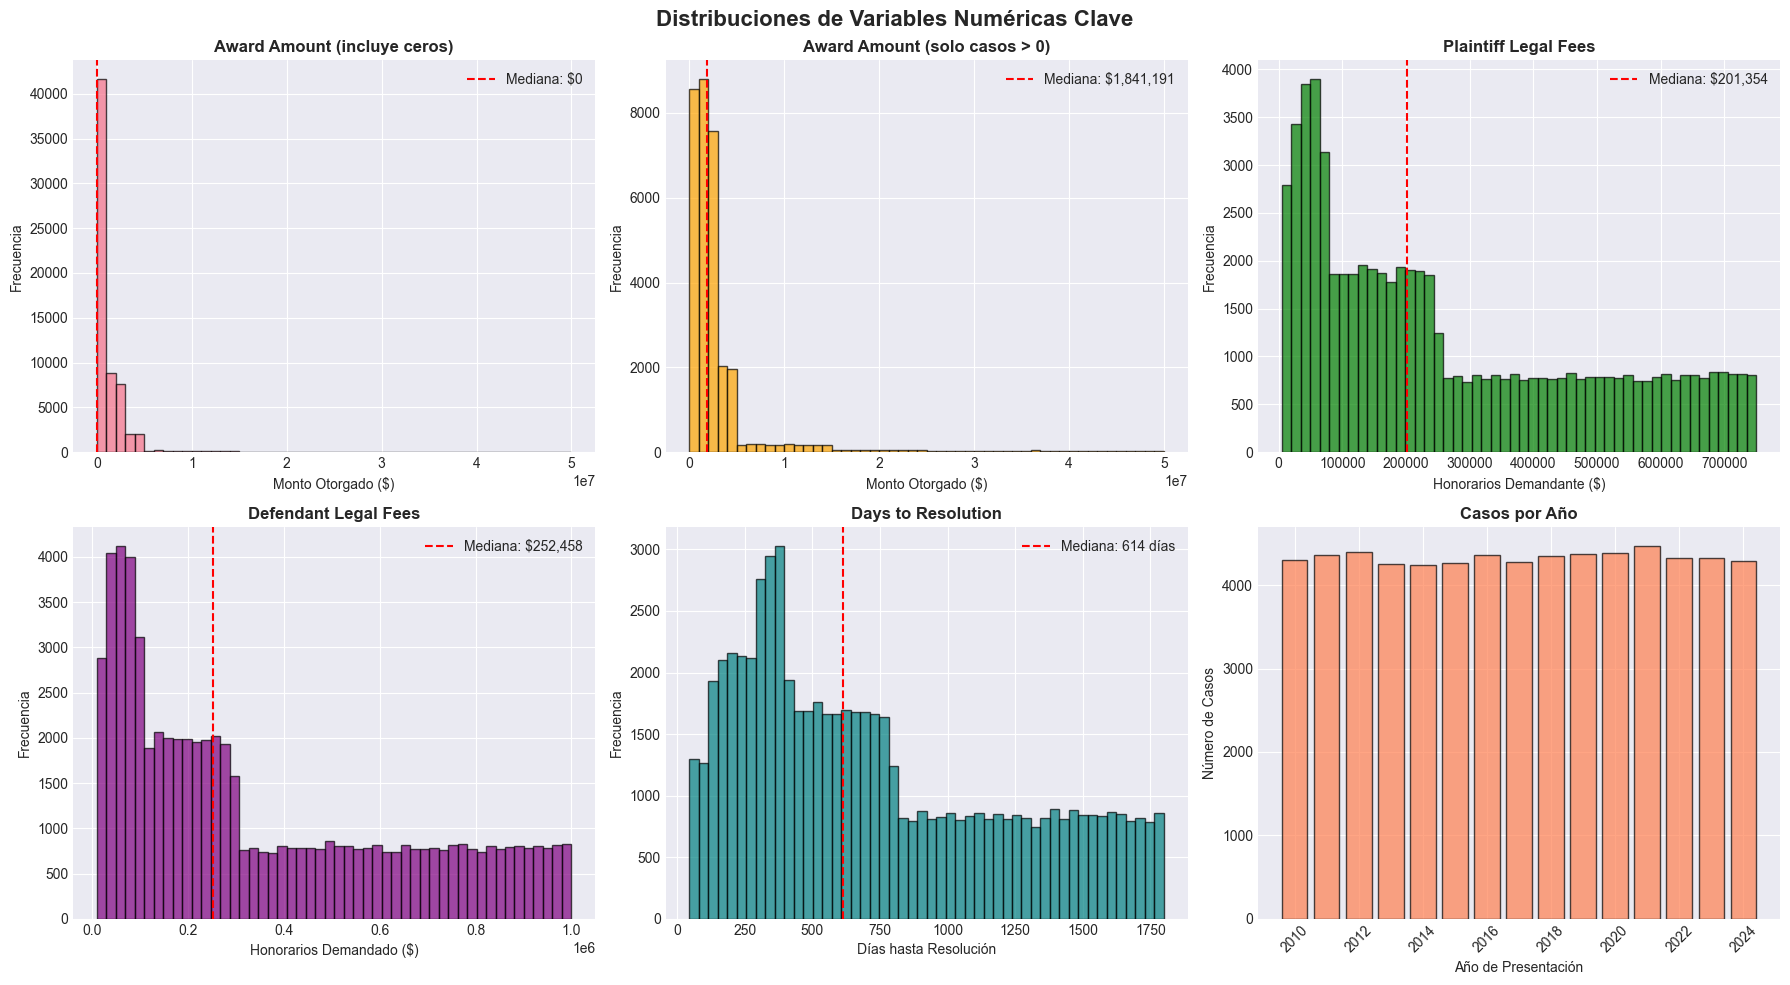

✓ Visualizaciones de distribuciones completadas


In [19]:
# Crear figura con subplots para las principales variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribuciones de Variables Numéricas Clave', fontsize=16, fontweight='bold')

# Award Amount (incluye ceros)
axes[0, 0].hist(df['Award_Amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Monto Otorgado ($)', fontsize=10)
axes[0, 0].set_ylabel('Frecuencia', fontsize=10)
axes[0, 0].set_title('Award Amount (incluye ceros)', fontweight='bold')
axes[0, 0].axvline(df['Award_Amount'].median(), color='red', 
                    linestyle='--', label=f'Mediana: ${df["Award_Amount"].median():,.0f}')
axes[0, 0].legend()

# Award Amount > 0 (solo casos con compensación)
award_nonzero = df[df['Award_Amount'] > 0]['Award_Amount']
axes[0, 1].hist(award_nonzero, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Monto Otorgado ($)', fontsize=10)
axes[0, 1].set_ylabel('Frecuencia', fontsize=10)
axes[0, 1].set_title('Award Amount (solo casos > 0)', fontweight='bold')
axes[0, 1].axvline(award_nonzero.median(), color='red', 
                    linestyle='--', label=f'Mediana: ${award_nonzero.median():,.0f}')
axes[0, 1].legend()

# Plaintiff Legal Fees
axes[0, 2].hist(df['Plaintiff_Legal_Fees'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_xlabel('Honorarios Demandante ($)', fontsize=10)
axes[0, 2].set_ylabel('Frecuencia', fontsize=10)
axes[0, 2].set_title('Plaintiff Legal Fees', fontweight='bold')
axes[0, 2].axvline(df['Plaintiff_Legal_Fees'].median(), color='red', 
                    linestyle='--', label=f'Mediana: ${df["Plaintiff_Legal_Fees"].median():,.0f}')
axes[0, 2].legend()

# Defendant Legal Fees
axes[1, 0].hist(df['Defendant_Legal_Fees'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_xlabel('Honorarios Demandado ($)', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Defendant Legal Fees', fontweight='bold')
axes[1, 0].axvline(df['Defendant_Legal_Fees'].median(), color='red', 
                    linestyle='--', label=f'Mediana: ${df["Defendant_Legal_Fees"].median():,.0f}')
axes[1, 0].legend()

# Days to Resolution
axes[1, 1].hist(df['Days_to_Resolution'], bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1, 1].set_xlabel('Días hasta Resolución', fontsize=10)
axes[1, 1].set_ylabel('Frecuencia', fontsize=10)
axes[1, 1].set_title('Days to Resolution', fontweight='bold')
axes[1, 1].axvline(df['Days_to_Resolution'].median(), color='red', 
                    linestyle='--', label=f'Mediana: {df["Days_to_Resolution"].median():.0f} días')
axes[1, 1].legend()

# Filing Year (distribución temporal)
year_counts = df['Filing_Year'].value_counts().sort_index()
axes[1, 2].bar(year_counts.index, year_counts.values, edgecolor='black', alpha=0.7, color='coral')
axes[1, 2].set_xlabel('Año de Presentación', fontsize=10)
axes[1, 2].set_ylabel('Número de Casos', fontsize=10)
axes[1, 2].set_title('Casos por Año', fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Visualizaciones de distribuciones completadas")

Interpretación de distribuciones


In [20]:
print("\nINTERPRETACIÓN DE DISTRIBUCIONES:")
print(f"• Award_Amount muestra distribución altamente asimétrica con {(df['Award_Amount']==0).sum():,} casos sin compensación")
print(f"• Solo {(df['Award_Amount']>0).sum():,} casos ({(df['Award_Amount']>0).mean()*100:.1f}%) recibieron compensación monetaria")
print(f"• Legal Fees muestran distribuciones un poco más uniformes, pero igualmente con un claro sesgo a la derecha")
print(f"• Days_to_Resolution: mediana de {df['Days_to_Resolution'].median():.0f} días (~{df['Days_to_Resolution'].median()/365:.1f} años)")



INTERPRETACIÓN DE DISTRIBUCIONES:
• Award_Amount muestra distribución altamente asimétrica con 33,169 casos sin compensación
• Solo 31,831 casos (49.0%) recibieron compensación monetaria
• Legal Fees muestran distribuciones un poco más uniformes, pero igualmente con un claro sesgo a la derecha
• Days_to_Resolution: mediana de 614 días (~1.7 años)


------------------------------------------------------------------------------
6.2 ANÁLISIS TEMPORAL (2010-2024)
------------------------------------------------------------------------------


In [21]:
print("\n[2/7] Analizando tendencias temporales...")



[2/7] Analizando tendencias temporales...


Crear análisis temporal por año


In [22]:
temporal_analysis = df.groupby('Filing_Year').agg({
    'Award_Amount': ['count', 'mean', 'median'],
    'Days_to_Resolution': 'median',
    'Plaintiff_Legal_Fees': 'median',
    'Defendant_Legal_Fees': 'median'
}).round(0)

print("\nESTADÍSTICOS POR AÑO:")
print(temporal_analysis)



ESTADÍSTICOS POR AÑO:
            Award_Amount                    Days_to_Resolution  \
                   count      mean   median             median   
Filing_Year                                                      
2010                4298  1.55e+06      0.0              600.0   
2011                4367  1.63e+06      0.0              623.0   
2012                4401  1.64e+06      0.0              620.0   
2013                4252  1.57e+06      0.0              608.0   
2014                4241  1.44e+06      0.0              615.0   
2015                4263  1.67e+06      0.0              610.0   
2016                4361  1.62e+06      0.0              625.0   
2017                4277  1.62e+06      0.0              612.0   
2018                4353  1.62e+06      0.0              600.0   
2019                4377  1.67e+06  17457.0              624.0   
2020                4390  1.52e+06      0.0              604.0   
2021                4474  1.61e+06      0.0          

Gráficos de tendencias temporales (volumen, montos, duración y % con compensación)

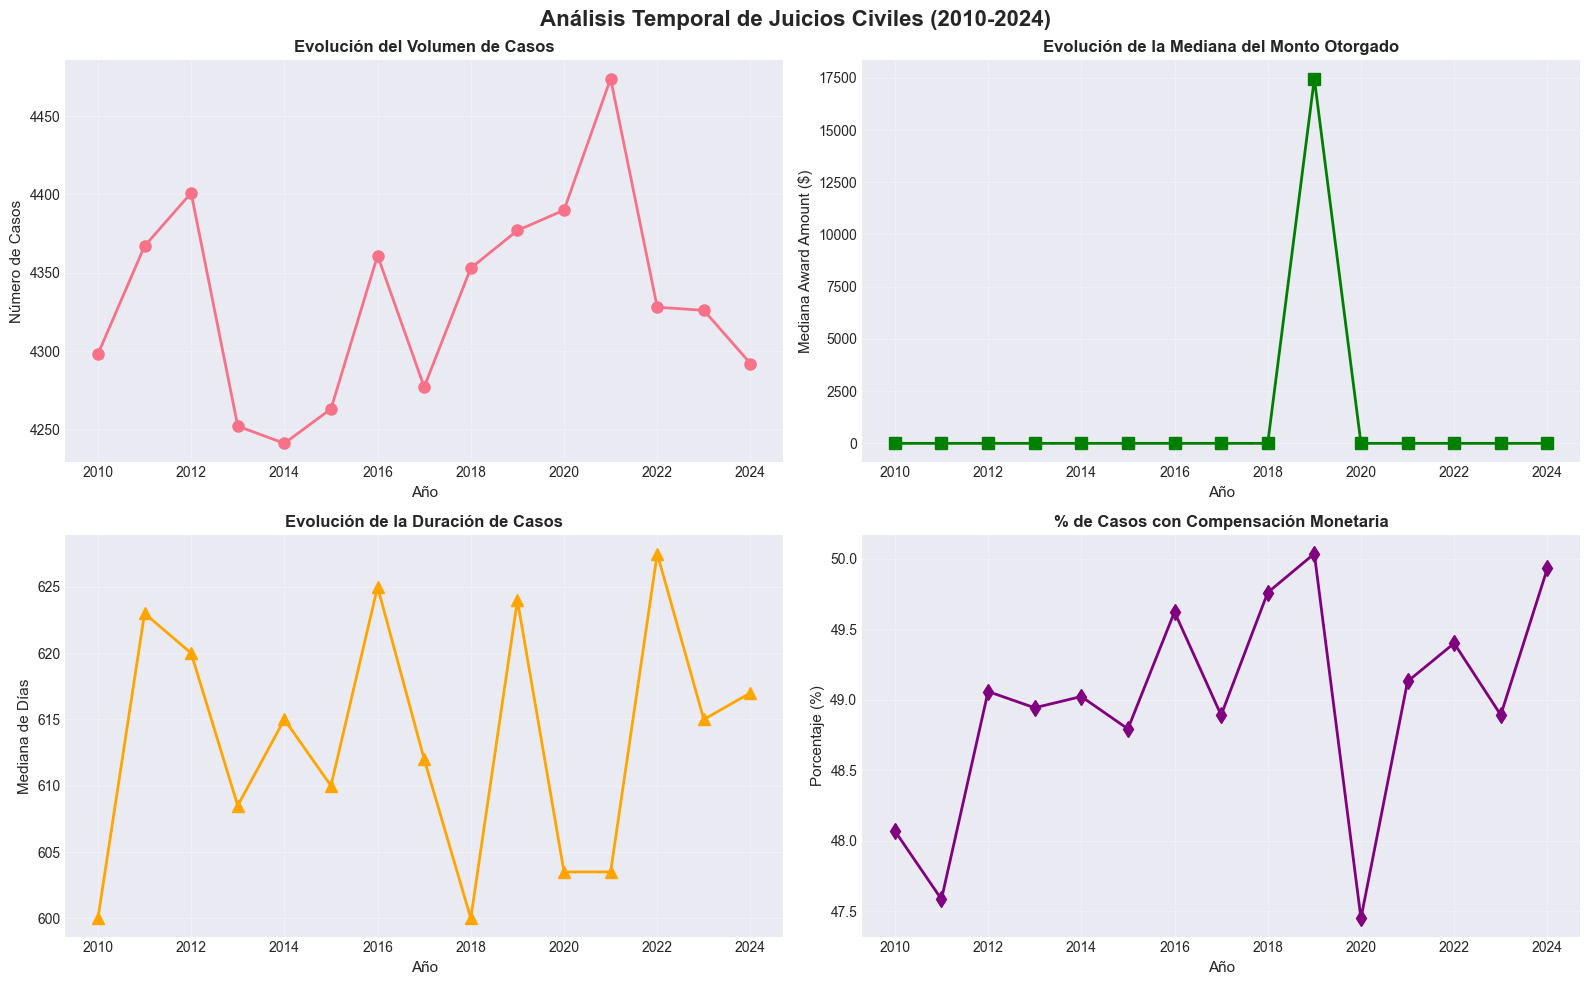

✓ Análisis temporal completado


In [23]:
# Visualización de tendencias temporales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis Temporal de Juicios Civiles (2010-2024)', fontsize=16, fontweight='bold')

# Número de casos por año
year_counts = df['Filing_Year'].value_counts().sort_index()
axes[0, 0].plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Año', fontsize=11)
axes[0, 0].set_ylabel('Número de Casos', fontsize=11)
axes[0, 0].set_title('Evolución del Volumen de Casos', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Mediana de Award Amount por año
median_awards = df.groupby('Filing_Year')['Award_Amount'].median()
axes[0, 1].plot(median_awards.index, median_awards.values, marker='s',
                linewidth=2, markersize=8, color='green')
axes[0, 1].set_xlabel('Año', fontsize=11)
axes[0, 1].set_ylabel('Mediana Award Amount ($)', fontsize=11)
axes[0, 1].set_title('Evolución de la Mediana del Monto Otorgado', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Mediana de días hasta resolución
median_days = df.groupby('Filing_Year')['Days_to_Resolution'].median()
axes[1, 0].plot(median_days.index, median_days.values, marker='^',
                linewidth=2, markersize=8, color='orange')
axes[1, 0].set_xlabel('Año', fontsize=11)
axes[1, 0].set_ylabel('Mediana de Días', fontsize=11)
axes[1, 0].set_title('Evolución de la Duración de Casos', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Proporción de casos con compensación por año
prop_awards = df.groupby('Filing_Year').apply(lambda x: (x['Award_Amount'] > 0).mean() * 100)
axes[1, 1].plot(prop_awards.index, prop_awards.values, marker='d',
                linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Año', fontsize=11)
axes[1, 1].set_ylabel('Porcentaje (%)', fontsize=11)
axes[1, 1].set_title('% de Casos con Compensación Monetaria', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Análisis temporal completado")

**Interpretación (2010-2024):**
- Volumen: estable, en el rango ~4.2k–4.7k casos/año; no hay saltos abruptos.
- Mediana de compensación: se mantiene en $0 casi todos los años, con un pico aislado en 2019 (indica que la mayoría de casos no reciben pago).
- Duración: mediana entre ~590–630 días; el tiempo de resolución es relativamente constante.
- % de casos con pago: ronda 48–50% sin tendencia clara; la probabilidad de compensación se mantiene plana.

------------------------------------------------------------------------------
6.3 ANÁLISIS DE CORRELACIONES
------------------------------------------------------------------------------


In [24]:
print("\n[3/7] Calculando matriz de correlaciones...")



[3/7] Calculando matriz de correlaciones...


Seleccionar solo variables numéricas


In [25]:
numeric_cols = ['Award_Amount', 'Plaintiff_Legal_Fees', 'Defendant_Legal_Fees', 
                'Days_to_Resolution', 'Filing_Year']
df_numeric = df[numeric_cols].copy()


Calcular matriz de correlación


In [26]:
correlation_matrix = df_numeric.corr()


Crear heatmap de correlaciones


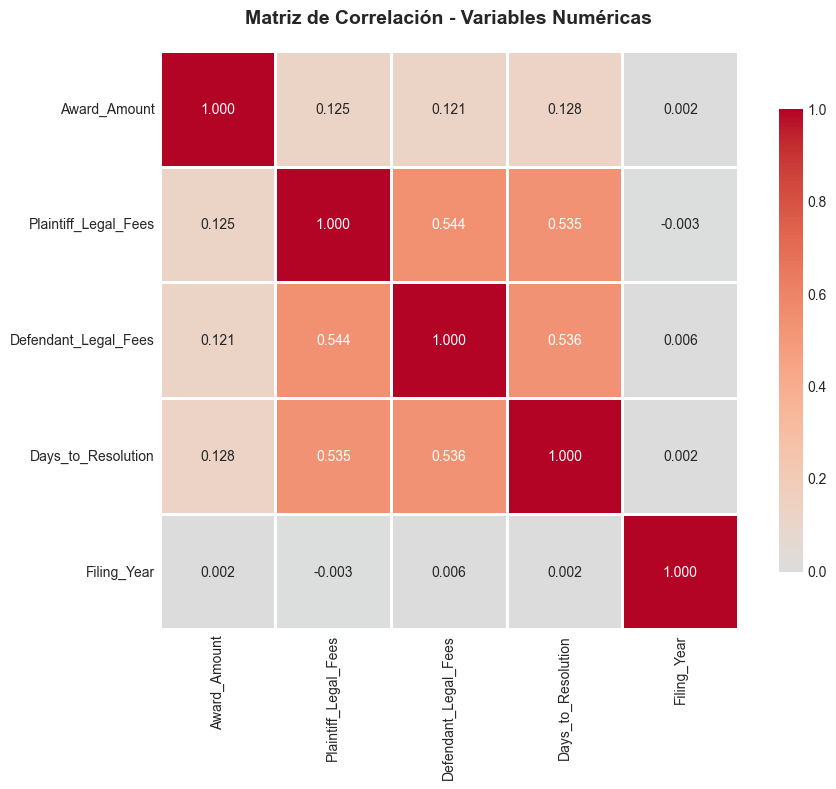


CORRELACIONES MÁS FUERTES CON AWARD_AMOUNT:
Award_Amount            1.00e+00
Days_to_Resolution      1.28e-01
Plaintiff_Legal_Fees    1.25e-01
Defendant_Legal_Fees    1.21e-01
Filing_Year             2.05e-03

✓ Análisis de correlaciones completado


In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCORRELACIONES MÁS FUERTES CON AWARD_AMOUNT:")
award_corr = correlation_matrix['Award_Amount'].sort_values(ascending=False)
print(award_corr.to_string())

print("\n✓ Análisis de correlaciones completado")


**Interpretación de correlaciones:**
- Award_Amount tiene correlaciones lineales muy débiles con honorarios y duración (≈0.12–0.13) y nula con el año; ningún predictor numérico explica fuertemente el monto.
- Los honorarios de demandante y demandado están moderadamente correlacionados entre sí (≈0.54) y con la duración (≈0.53–0.54), sugiriendo que casos más largos tienden a ser más costosos para ambas partes.
- Days_to_Resolution y Filing_Year prácticamente no aportan señal directa sobre Award_Amount en este esquema lineal simple.
- Implicación: para predecir montos, se necesitarán variables adicionales, posibles transformaciones (log) o modelos no lineales/estratificados.

------------------------------------------------------------------------------
6.4 ANÁLISIS POR GRUPOS - OUTCOME Y RESOLUTION METHOD
------------------------------------------------------------------------------


In [28]:
print("\n[4/7] Analizando distribuciones por grupos...")



[4/7] Analizando distribuciones por grupos...


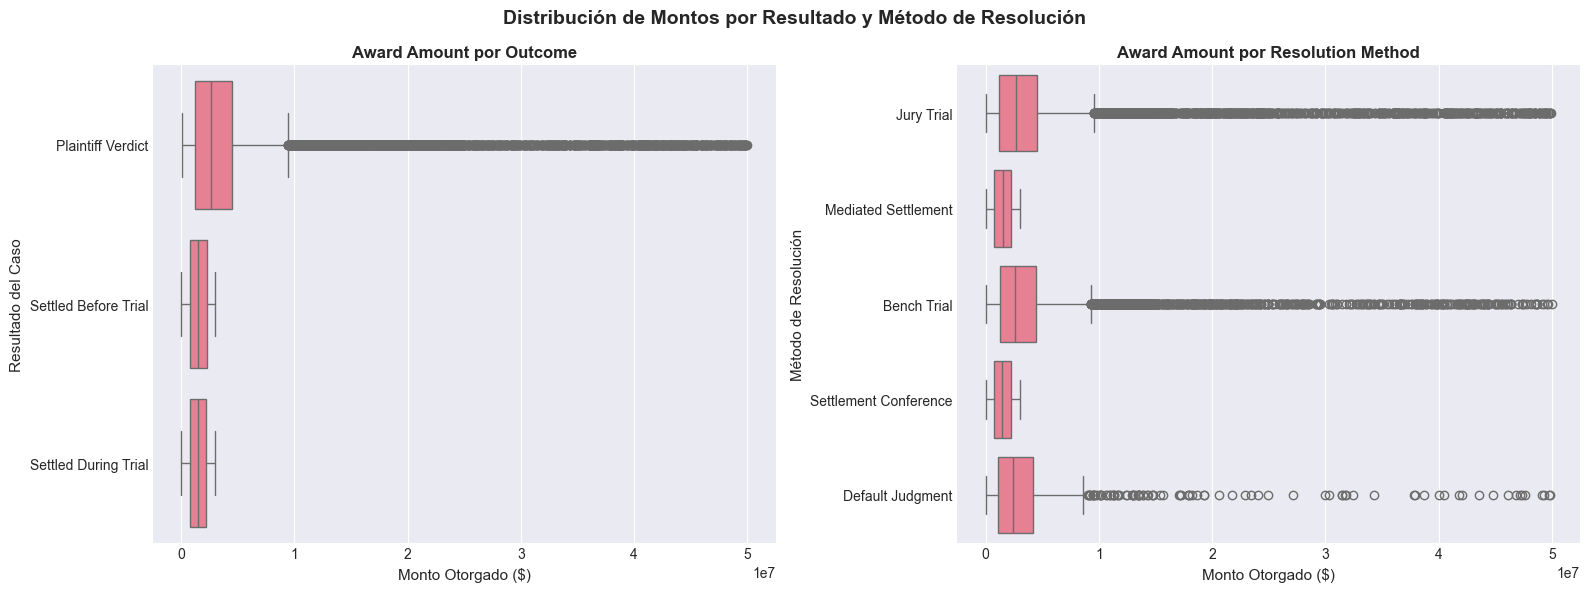

In [29]:
# Filtrar solo casos con compensación
df_with_award = df[df['Award_Amount'] > 0].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución de Montos por Resultado y Método de Resolución', fontsize=14, fontweight='bold')

# Por Outcome
sns.boxplot(data=df_with_award, y='Outcome', x='Award_Amount', ax=axes[0])
axes[0].set_xlabel('Monto Otorgado ($)', fontsize=11)
axes[0].set_ylabel('Resultado del Caso', fontsize=11)
axes[0].set_title('Award Amount por Outcome', fontweight='bold')

# Por Resolution Method
sns.boxplot(data=df_with_award, y='Resolution_Method', x='Award_Amount', ax=axes[1])
axes[1].set_xlabel('Monto Otorgado ($)', fontsize=11)
axes[1].set_ylabel('Método de Resolución', fontsize=11)
axes[1].set_title('Award Amount por Resolution Method', fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
print("\nESTADÍSTICOS POR OUTCOME:")
print(df.groupby('Outcome')['Award_Amount'].describe())

print("\nESTADÍSTICOS POR RESOLUTION METHOD:")
print(df.groupby('Resolution_Method')['Award_Amount'].describe())

print("✓ Análisis por grupos completado")



ESTADÍSTICOS POR OUTCOME:
                                 count      mean       std      min       25%  \
Outcome                                                                         
Defendant Verdict              20174.0  0.00e+00  0.00e+00      0.0  0.00e+00   
Dismissed - Motion to Dismiss   4985.0  0.00e+00  0.00e+00      0.0  0.00e+00   
Dismissed - Summary Judgment    4685.0  0.00e+00  0.00e+00      0.0  0.00e+00   
Dismissed - Voluntary           3325.0  0.00e+00  0.00e+00      0.0  0.00e+00   
Plaintiff Verdict              15455.0  5.13e+06  8.09e+06  25426.0  1.22e+06   
Settled Before Trial           12597.0  1.52e+06  8.70e+05  10175.0  7.66e+05   
Settled During Trial            3779.0  1.47e+06  8.59e+05  12062.0  7.43e+05   

                                    50%       75%       max  
Outcome                                                      
Defendant Verdict              0.00e+00  0.00e+00  0.00e+00  
Dismissed - Motion to Dismiss  0.00e+00  0.00e+00  0.00e+

------------------------------------------------------------------------------
6.5 ANÁLISIS DE OUTLIERS
------------------------------------------------------------------------------


In [31]:
print("\n[5/7] Identificando outliers...")

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound



[5/7] Identificando outliers...


Analizar outliers en variables clave


In [32]:
outlier_vars = ['Award_Amount', 'Plaintiff_Legal_Fees', 'Defendant_Legal_Fees', 'Days_to_Resolution']

print("\nDETECCIÓN DE OUTLIERS (Método IQR):")
print("-" * 80)

for var in outlier_vars:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    print(f"\n{var}:")
    print(f"  - Límite inferior: ${lower:,.2f}" if 'Amount' in var or 'Fees' in var else f"  - Límite inferior: {lower:.0f}")
    print(f"  - Límite superior: ${upper:,.2f}" if 'Amount' in var or 'Fees' in var else f"  - Límite superior: {upper:.0f}")
    print(f"  - Outliers detectados: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  - Valor máximo outlier: ${outliers[var].max():,.2f}" if 'Amount' in var or 'Fees' in var else f"  - Valor máximo outlier: {outliers[var].max():.0f}")

print("\n✓ Análisis de outliers completado")



DETECCIÓN DE OUTLIERS (Método IQR):
--------------------------------------------------------------------------------

Award_Amount:
  - Límite inferior: $-2,701,375.50
  - Límite superior: $4,502,292.50
  - Outliers detectados: 3,883 (5.97%)
  - Valor máximo outlier: $49,994,456.00

Plaintiff_Legal_Fees:
  - Límite inferior: $-483,659.00
  - Límite superior: $1,002,813.00
  - Outliers detectados: 0 (0.00%)

Defendant_Legal_Fees:
  - Límite inferior: $-648,246.88
  - Límite superior: $1,333,664.12
  - Outliers detectados: 0 (0.00%)

Days_to_Resolution:
  - Límite inferior: -842
  - Límite superior: 2286
  - Outliers detectados: 0 (0.00%)

✓ Análisis de outliers completado


------------------------------------------------------------------------------
6.6 ANÁLISIS POR CIRCUITO Y TIPO DE CASO
------------------------------------------------------------------------------


In [33]:
print("\n[6/7] Analizando distribuciones por circuito y tipo de caso...")



[6/7] Analizando distribuciones por circuito y tipo de caso...


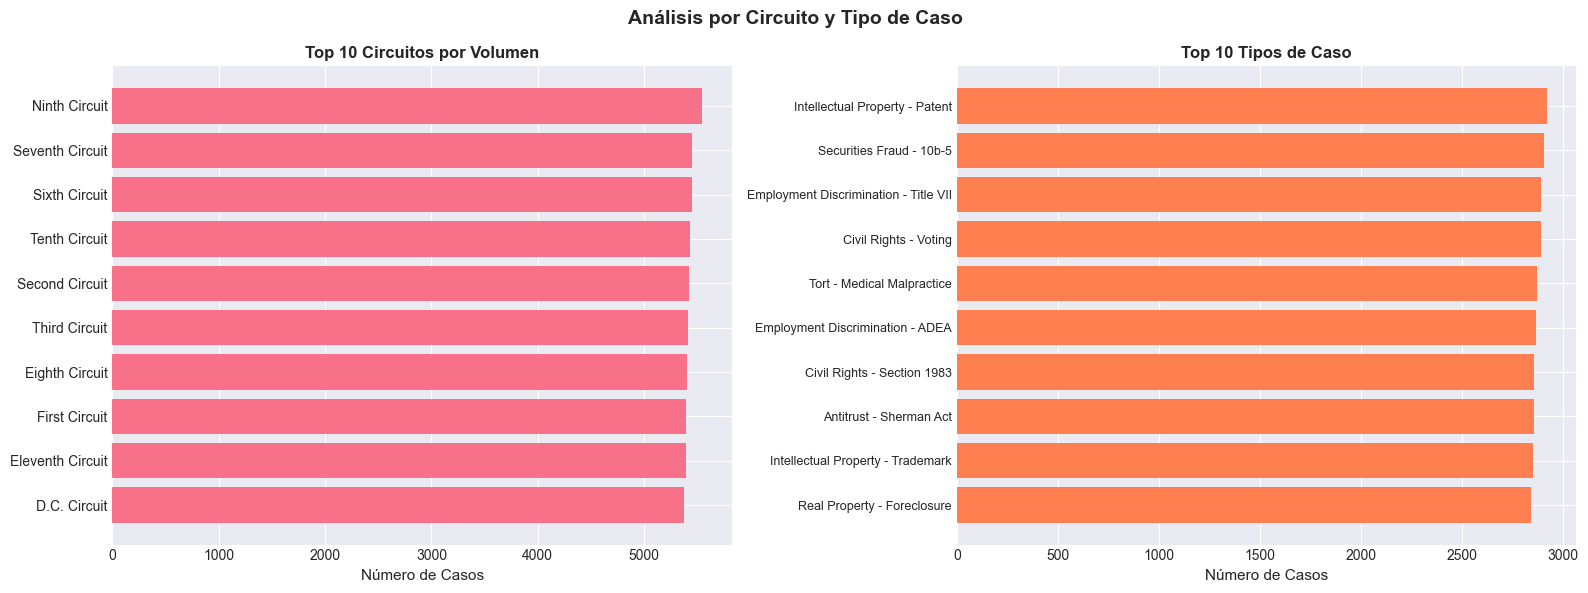

In [34]:
# Datos para plots
top_case_types = df['Case_Type'].value_counts().head(10)
circuit_counts = df['Circuit'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis por Circuito y Tipo de Caso', fontsize=14, fontweight='bold')

# Casos por circuito
axes[0].barh(range(len(circuit_counts)), circuit_counts.values)
axes[0].set_yticks(range(len(circuit_counts)))
axes[0].set_yticklabels(circuit_counts.index)
axes[0].set_xlabel('Número de Casos', fontsize=11)
axes[0].set_title('Top 10 Circuitos por Volumen', fontweight='bold')
axes[0].invert_yaxis()

# Top 10 tipos de caso
axes[1].barh(range(len(top_case_types)), top_case_types.values, color='coral')
axes[1].set_yticks(range(len(top_case_types)))
axes[1].set_yticklabels(top_case_types.index, fontsize=9)
axes[1].set_xlabel('Número de Casos', fontsize=11)
axes[1].set_title('Top 10 Tipos de Caso', fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [35]:
print("\nAWARD AMOUNT MEDIANO POR TIPO DE CASO (Top 10):")
median_by_casetype = df.groupby('Case_Type')['Award_Amount'].agg(['median', 'count']).sort_values('count', ascending=False).head(10)
print(median_by_casetype.to_string())

print("\n✓ Análisis por circuito y tipo de caso completado")



AWARD AMOUNT MEDIANO POR TIPO DE CASO (Top 10):
                                         median  count
Case_Type                                             
Intellectual Property - Patent              0.0   2918
Securities Fraud - 10b-5                    0.0   2904
Employment Discrimination - Title VII       0.0   2891
Civil Rights - Voting                       0.0   2888
Tort - Medical Malpractice             772196.0   2868
Employment Discrimination - ADEA            0.0   2863
Civil Rights - Section 1983                 0.0   2856
Antitrust - Sherman Act                     0.0   2855
Intellectual Property - Trademark      186084.5   2852
Real Property - Foreclosure                 0.0   2839

✓ Análisis por circuito y tipo de caso completado


------------------------------------------------------------------------------
6.7 SCATTER PLOTS - RELACIONES ENTRE VARIABLES
------------------------------------------------------------------------------



[7/7] Generando scatter plots de relaciones clave...


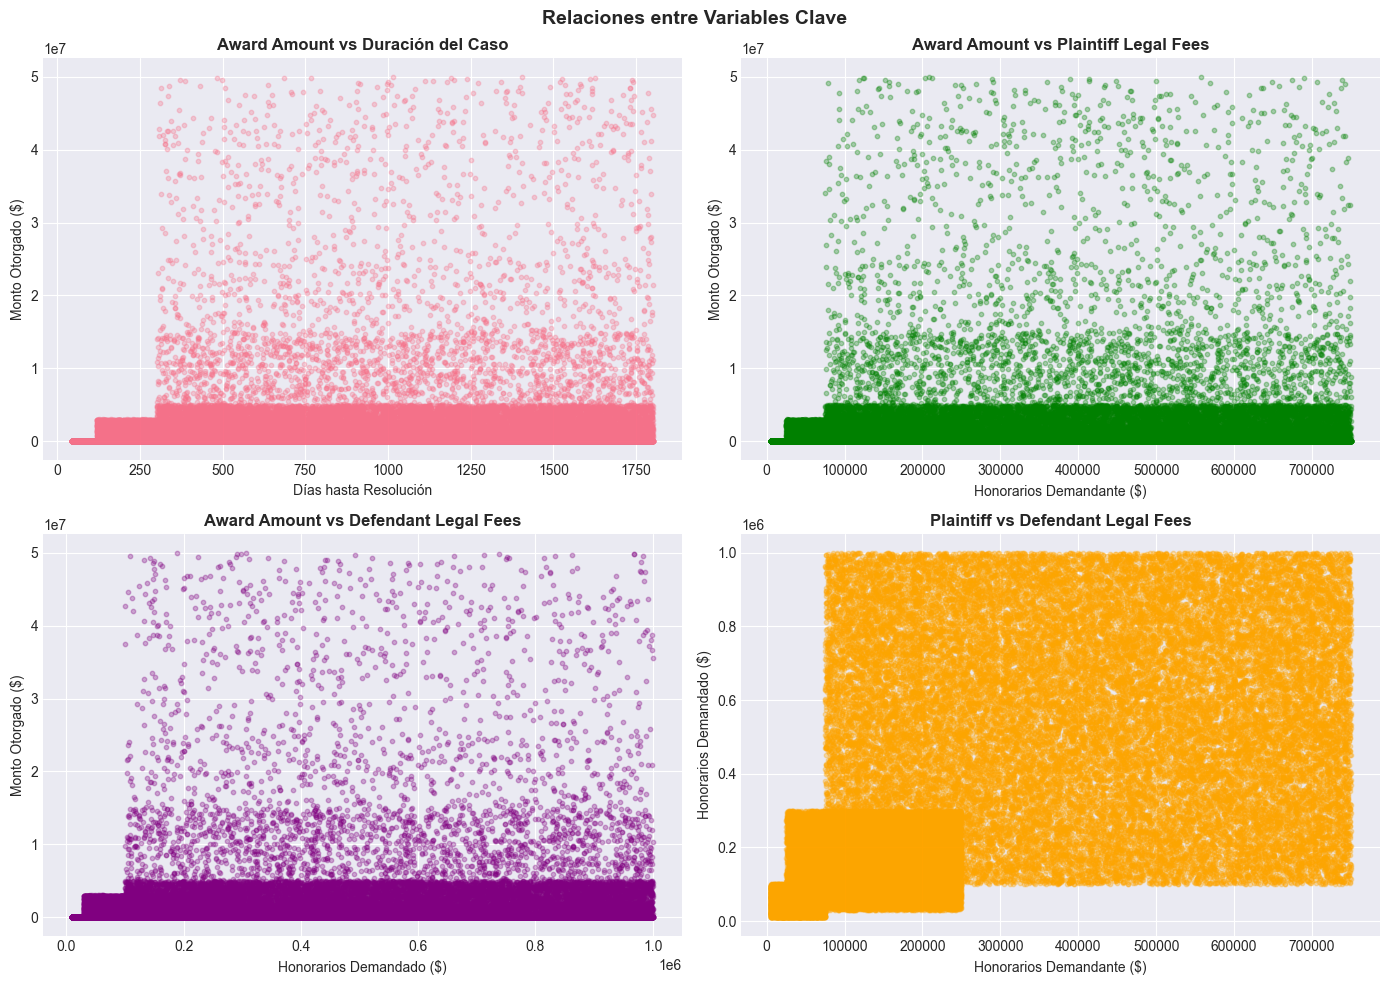

✓ Scatter plots completados


In [36]:
print("\n[7/7] Generando scatter plots de relaciones clave...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relaciones entre Variables Clave', fontsize=14, fontweight='bold')

# Award Amount vs Days to Resolution
axes[0, 0].scatter(df['Days_to_Resolution'], df['Award_Amount'], alpha=0.3, s=10)
axes[0, 0].set_xlabel('Días hasta Resolución', fontsize=10)
axes[0, 0].set_ylabel('Monto Otorgado ($)', fontsize=10)
axes[0, 0].set_title('Award Amount vs Duración del Caso', fontweight='bold')

# Award Amount vs Plaintiff Legal Fees
axes[0, 1].scatter(df['Plaintiff_Legal_Fees'], df['Award_Amount'], alpha=0.3, s=10, color='green')
axes[0, 1].set_xlabel('Honorarios Demandante ($)', fontsize=10)
axes[0, 1].set_ylabel('Monto Otorgado ($)', fontsize=10)
axes[0, 1].set_title('Award Amount vs Plaintiff Legal Fees', fontweight='bold')

# Award Amount vs Defendant Legal Fees
axes[1, 0].scatter(df['Defendant_Legal_Fees'], df['Award_Amount'], alpha=0.3, s=10, color='purple')
axes[1, 0].set_xlabel('Honorarios Demandado ($)', fontsize=10)
axes[1, 0].set_ylabel('Monto Otorgado ($)', fontsize=10)
axes[1, 0].set_title('Award Amount vs Defendant Legal Fees', fontweight='bold')

# Plaintiff vs Defendant Legal Fees
axes[1, 1].scatter(df['Plaintiff_Legal_Fees'], df['Defendant_Legal_Fees'], alpha=0.3, s=10, color='orange')
axes[1, 1].set_xlabel('Honorarios Demandante ($)', fontsize=10)
axes[1, 1].set_ylabel('Honorarios Demandado ($)', fontsize=10)
axes[1, 1].set_title('Plaintiff vs Defendant Legal Fees', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Scatter plots completados")

## Resumen general del EDA
- Volumen de casos estable en el tiempo; no se observan shocks en entradas.
- Procesos largos pero consistentes: mediana ~600 días, sin grandes variaciones.
- Compensaciones muy asimétricas: la mayoría de casos no paga; pocos outliers concentran montos altos.
- Correlaciones lineales con `Award_Amount` son débiles; honorarios de ambas partes crecen juntos y con la duración.
- Outcome/método y tipo de caso/circuito son los diferenciadores clave; conviene segmentar modelos y usar transformaciones (p. ej., log) y métodos robustos para manejar colas largas.

## 7. PREPROCESAMIENTO DE DATOS


OBJETIVOS DEL PREPROCESAMIENTO:

1. **Ajuste por inflación**: Convertir todas las variables monetarias a dólares constantes de 2024 utilizando el Índice de Precios al Consumidor (CPI) oficial de EE.UU.
2. **Control de outliers**: Aplicar winsorization para limitar el impacto de valores extremos sin eliminarlos completamente.
3. **Codificación de variables categóricas**: Transformar variables de texto a formato numérico para análisis estadístico.
4. **División estratificada**: Separar datos en entrenamiento y prueba preservando la distribución temporal.

JUSTIFICACIÓN METODOLÓGICA:

- **Ajuste por inflación**: Requisito obligatorio para comparaciones temporales válidas (2010-2024)
- **Winsorization**: Método robusto que preserva información de outliers sin distorsionar análisis
- **One-hot encoding**: Adecuado para variables categóricas nominales sin orden intrínseco
- **División estratificada**: Preserva distribución de años, esencial para validez temporal


### 7.1 Ajuste por inflación (CPI 2010-2024)

In [37]:
print("="*80)
print("AJUSTANDO VARIABLES MONETARIAS POR INFLACIÓN")
print("="*80)

# Datos del Índice de Precios al Consumidor (CPI) de EE.UU. (Bureau of Labor Statistics)
cpi_data = {
    2010: 218.056, 2011: 224.939, 2012: 229.594, 2013: 232.957,
    2014: 236.736, 2015: 237.017, 2016: 240.007, 2017: 245.120,
    2018: 251.107, 2019: 255.657, 2020: 258.811, 2021: 270.970,
    2022: 292.655, 2023: 304.702, 2024: 313.548
}

# Convertir a DataFrame
cpi_df = pd.DataFrame(list(cpi_data.items()), columns=['Filing_Year', 'CPI'])

# Mostrar datos CPI
print("\nÍNDICE DE PRECIOS AL CONSUMIDOR (CPI) 2010-2024:")
print(cpi_df.to_string(index=False))

# Unir datos del CPI al dataset principal
df = pd.merge(df, cpi_df, on='Filing_Year', how='left')

# Calcular factor de ajuste (base 2024)
cpi_2024 = cpi_df.loc[cpi_df['Filing_Year'] == 2024, 'CPI'].values[0]
df['adjustment_factor'] = cpi_2024 / df['CPI']

# Variables monetarias a ajustar
monetary_cols = ['Award_Amount', 'Plaintiff_Legal_Fees', 'Defendant_Legal_Fees']

print(f"\nAJUSTANDO {len(monetary_cols)} VARIABLES MONETARIAS:")

# Aplicar ajuste por inflación: crear nuevas columnas en dólares constantes 2024
for col in monetary_cols:
    # Crear nueva columna ajustada
    df[f'{col}_2024'] = df[col] * df['adjustment_factor']
    
    # Calcular estadísticas de ajuste
    inflation_effect = ((df[f'{col}_2024'] - df[col]) / df[col]).mean() * 100
    print(f"  ✓ {col}:")
    print(f"     - Media original: ${df[col].mean():,.2f}")
    print(f"     - Media ajustada 2024: ${df[f'{col}_2024'].mean():,.2f}")
    print(f"     - Efecto inflación promedio: {inflation_effect:+.1f}%")

# Eliminar columnas auxiliares (CPI y factor de ajuste)
df.drop(['CPI', 'adjustment_factor'], axis=1, inplace=True)

print(f"\n✓ Ajuste por inflación completado exitosamente")
print(f"✓ Nuevas columnas creadas:")
for col in monetary_cols:
    print(f"  - {col}_2024 (dólares constantes 2024)")

AJUSTANDO VARIABLES MONETARIAS POR INFLACIÓN

ÍNDICE DE PRECIOS AL CONSUMIDOR (CPI) 2010-2024:
 Filing_Year    CPI
        2010 218.06
        2011 224.94
        2012 229.59
        2013 232.96
        2014 236.74
        2015 237.02
        2016 240.01
        2017 245.12
        2018 251.11
        2019 255.66
        2020 258.81
        2021 270.97
        2022 292.65
        2023 304.70
        2024 313.55

AJUSTANDO 3 VARIABLES MONETARIAS:
  ✓ Award_Amount:
     - Media original: $1,599,618.81
     - Media ajustada 2024: $1,994,941.30
     - Efecto inflación promedio: +24.7%
  ✓ Plaintiff_Legal_Fees:
     - Media original: $269,716.97
     - Media ajustada 2024: $336,614.80
     - Efecto inflación promedio: +24.8%
  ✓ Defendant_Legal_Fees:
     - Media original: $355,101.63
     - Media ajustada 2024: $442,841.28
     - Efecto inflación promedio: +24.8%

✓ Ajuste por inflación completado exitosamente
✓ Nuevas columnas creadas:
  - Award_Amount_2024 (dólares constantes 2024)
  - P

### 7.2 Control de outliers (Winsorization)

In [38]:
print("\n" + "="*80)
print("CONTROL DE OUTLIERS MEDIANTE WINSORIZATION")
print("="*80)

# Importar función de winsorization
from scipy.stats.mstats import winsorize

print("\nJUSTIFICACIÓN DE WINSORIZATION:")
print("- Preserva todos los casos (no elimina datos)")
print("- Limita impacto de valores extremos en análisis estadístico")
print("- Mantiene estructura de distribución central")
print("- Umbral: percentiles 1% y 99% (valores fuera de este rango son ajustados)")

# Variables a tratar con winsorization
winsorize_cols = ['Award_Amount_2024']

print(f"\nAPLICANDO WINSORIZATION A {len(winsorize_cols)} VARIABLES:")

for col in winsorize_cols:
    # Guardar estadísticas originales
    original_min = df[col].min()
    original_max = df[col].max()
    original_mean = df[col].mean()
    original_std = df[col].std()
    
    # Aplicar winsorization (1% en ambos extremos)
    winsorized_data = winsorize(df[col], limits=[0.01, 0.01])
    df[f'{col}_winsorized'] = winsorized_data
    
    # Calcular estadísticas después
    winsorized_min = df[f'{col}_winsorized'].min()
    winsorized_max = df[f'{col}_winsorized'].max()
    winsorized_mean = df[f'{col}_winsorized'].mean()
    winsorized_std = df[f'{col}_winsorized'].std()
    
    # Mostrar comparación
    print(f"\n  {col}:")
    print(f"    ORIGINAL:     Min=${original_min:,.0f}, Max=${original_max:,.0f}, "
          f"Mean=${original_mean:,.0f}, SD=${original_std:,.0f}")
    print(f"    WINSORIZED:   Min=${winsorized_min:,.0f}, Max=${winsorized_max:,.0f}, "
          f"Mean=${winsorized_mean:,.0f}, SD=${winsorized_std:,.0f}")
    
    # Calcular reducción de rango
    range_reduction = ((original_max - original_min) - (winsorized_max - winsorized_min)) / (original_max - original_min) * 100
    std_reduction = ((original_std - winsorized_std) / original_std) * 100
    
    print(f"    EFECTO:       Reducción de rango: {range_reduction:.1f}%, "
          f"Reducción de desviación: {std_reduction:.1f}%")

print(f"\n✓ Winsorization completado:")
print(f"  - {len(winsorize_cols)} variables tratadas")
print(f"  - Nuevas columnas creadas con sufijo '_winsorized'")
print(f"  - Valores extremos limitados sin eliminación de casos")


CONTROL DE OUTLIERS MEDIANTE WINSORIZATION

JUSTIFICACIÓN DE WINSORIZATION:
- Preserva todos los casos (no elimina datos)
- Limita impacto de valores extremos en análisis estadístico
- Mantiene estructura de distribución central
- Umbral: percentiles 1% y 99% (valores fuera de este rango son ajustados)

APLICANDO WINSORIZATION A 1 VARIABLES:

  Award_Amount_2024:
    ORIGINAL:     Min=$0, Max=$69,360,515, Mean=$1,994,941, SD=$5,616,238
    WINSORIZED:   Min=$0, Max=$30,995,838, Mean=$1,834,436, SD=$4,316,646
    EFECTO:       Reducción de rango: 55.3%, Reducción de desviación: 23.1%

✓ Winsorization completado:
  - 1 variables tratadas
  - Nuevas columnas creadas con sufijo '_winsorized'
  - Valores extremos limitados sin eliminación de casos


### 7.3 Codificación de variables categóricas

In [39]:
print("\n" + "="*80)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS (ONE-HOT ENCODING)")
print("="*80)

print("\nJUSTIFICACIÓN DEL ONE-HOT ENCODING:")
print("- Variables categóricas nominales (sin orden intrínseco)")
print("- Evita jerarquías artificiales (ej: Tort=1, Contract=2)")
print("- Cada categoría se representa como variable binaria independiente")
print("- Adecuado para modelos de regresión y machine learning")

# Identificar variables categóricas para codificación
categorical_cols = ['Case_Type', 'Circuit', 'Outcome', 'Resolution_Method', 
                    'Plaintiff_Type', 'Defendant_Type']

print(f"\nVARIABLES CATEGÓRICAS IDENTIFICADAS ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_values = df[col].nunique()
    print(f"  - {col}: {unique_values} categorías únicas")

# Guardar DataFrame original antes de codificación
df_original_shape = df.shape
print(f"\nDataset original: {df_original_shape[0]} filas × {df_original_shape[1]} columnas")

# Aplicar one-hot encoding
print("\nAPLICANDO ONE-HOT ENCODING...")
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Información sobre la codificación
df_encoded_shape = df_encoded.shape
new_cols_count = df_encoded_shape[1] - df_original_shape[1]

print(f"\n✓ Codificación completada:")
print(f"  - Columnas originales: {df_original_shape[1]}")
print(f"  - Columnas después de encoding: {df_encoded_shape[1]}")
print(f"  - Nuevas columnas creadas: {new_cols_count}")

# Mostrar algunas de las nuevas columnas
print(f"\nEJEMPLO DE NUEVAS COLUMNAS (primeras 10):")
new_dummy_cols = [col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols)]
for col in new_dummy_cols[:10]:
    print(f"  - {col}")

# Preservar columnas importantes para referencia
important_cols = ['Case_ID', 'Filing_Year', 'Days_to_Resolution',
                  'Award_Amount_2024', 'Award_Amount_2024_winsorized',
                  'Plaintiff_Legal_Fees_2024_winsorized',
                  'Defendant_Legal_Fees_2024_winsorized']

print(f"\nCOLUMNAS CLAVE PRESERVADAS:")
for col in important_cols:
    if col in df_encoded.columns:
        print(f"  ✓ {col}")


CODIFICACIÓN DE VARIABLES CATEGÓRICAS (ONE-HOT ENCODING)

JUSTIFICACIÓN DEL ONE-HOT ENCODING:
- Variables categóricas nominales (sin orden intrínseco)
- Evita jerarquías artificiales (ej: Tort=1, Contract=2)
- Cada categoría se representa como variable binaria independiente
- Adecuado para modelos de regresión y machine learning

VARIABLES CATEGÓRICAS IDENTIFICADAS (6):
  - Case_Type: 23 categorías únicas
  - Circuit: 12 categorías únicas
  - Outcome: 7 categorías únicas
  - Resolution_Method: 9 categorías únicas
  - Plaintiff_Type: 12 categorías únicas
  - Defendant_Type: 12 categorías únicas

Dataset original: 65000 filas × 21 columnas

APLICANDO ONE-HOT ENCODING...

✓ Codificación completada:
  - Columnas originales: 21
  - Columnas después de encoding: 84
  - Nuevas columnas creadas: 63

EJEMPLO DE NUEVAS COLUMNAS (primeras 10):
  - Case_Type_Bankruptcy - Adversary
  - Case_Type_Civil Rights - Section 1983
  - Case_Type_Civil Rights - Voting
  - Case_Type_Contract Dispute
  - Case

### 7.4 División estratificada de datos (Train/Test)

In [40]:
print("\n" + "="*80)
print("DIVISIÓN ESTRATIFICADA DE DATOS - ENTRENAMIENTO (80%) / PRUEBA (20%)")
print("="*80)

print("\nJUSTIFICACIÓN DE DIVISIÓN ESTRATIFICADA:")
print("- Preserva distribución de Filing_Year en ambos conjuntos")
print("- Evita que años completos queden solo en train o solo en test")
print("- Garantiza representatividad temporal (2010-2024)")
print("- Proporción 80/20: balance entre entrenamiento robusto y validación confiable")

# Definir variables para modelo de regresión (Pregunta 1)
print("\nPREPARANDO VARIABLES PARA MODELADO:")

# Columnas a excluir (no son predictores)
exclude_cols = ['Case_ID', 'Filing_Year',  # Mantenemos Filing_Year para estratificación
                'Plaintiff_Counsel', 'Defendant_Counsel', 'Presiding_Judge',
                'Award_Amount', 'Plaintiff_Legal_Fees', 'Defendant_Legal_Fees',  # Originales no ajustadas
                'Award_Amount_2024', 'Plaintiff_Legal_Fees_2024', 'Defendant_Legal_Fees_2024']  # Ajustadas pero no winsorizadas

# Variable objetivo: Award_Amount_2024_winsorized (para Pregunta 1)
target_col = 'Award_Amount_2024_winsorized'

# Predictores: todas las columnas excepto las excluidas y la objetivo
X = df_encoded.drop(columns=[col for col in exclude_cols + [target_col] if col in df_encoded.columns])
y = df_encoded[target_col]

print(f"  - Predictores (X): {X.shape[1]} variables")
print(f"  - Variable objetivo (y): {target_col}")
print(f"  - Total de casos: {X.shape[0]:,}")

# DIVISIÓN ESTRATIFICADA (preservando distribución de Filing_Year)
print("\nEJECUTANDO DIVISIÓN ESTRATIFICADA...")

# Usar Filing_Year para estratificación
stratify_var = df_encoded['Filing_Year']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% para prueba
    random_state=42,         # Semilla para reproducibilidad
    stratify=stratify_var    # Estratificar por año
)

print(f"\n✓ División completada exitosamente:")
print(f"  - Conjunto de ENTRENAMIENTO: {X_train.shape[0]:,} casos ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Conjunto de PRUEBA: {X_test.shape[0]:,} casos ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  - Número de predictores: {X_train.shape[1]}")

# Verificar que la estratificación funcionó
print("\nVERIFICACIÓN DE ESTRATIFICACIÓN (distribución por año):")

train_years = df_encoded.loc[X_train.index, 'Filing_Year']
test_years = df_encoded.loc[X_test.index, 'Filing_Year']

print(f"\n  {'Año':<6} {'Train':<8} {'Test':<8} {'Diferencia':<12}")
print("-" * 40)

for year in sorted(df_encoded['Filing_Year'].unique()):
    train_pct = (train_years == year).mean() * 100
    test_pct = (test_years == year).mean() * 100
    diff = abs(train_pct - test_pct)
    
    print(f"  {year:<6} {train_pct:>6.1f}% {test_pct:>6.1f}% {diff:>10.2f}%")

# Calcular diferencia máxima
max_diff = max(abs((train_years == year).mean() - (test_years == year).mean()) for year in df_encoded['Filing_Year'].unique()) * 100
print(f"\n  Diferencia máxima entre conjuntos: {max_diff:.2f}%")
print(f"  {'✅ Estratificación ÓPTIMA - Distribución idéntica' if max_diff < 0.01 else '✅ Estratificación exitosa' if max_diff < 2 else '⚠️  Revisar estratificación'}")


DIVISIÓN ESTRATIFICADA DE DATOS - ENTRENAMIENTO (80%) / PRUEBA (20%)

JUSTIFICACIÓN DE DIVISIÓN ESTRATIFICADA:
- Preserva distribución de Filing_Year en ambos conjuntos
- Evita que años completos queden solo en train o solo en test
- Garantiza representatividad temporal (2010-2024)
- Proporción 80/20: balance entre entrenamiento robusto y validación confiable

PREPARANDO VARIABLES PARA MODELADO:
  - Predictores (X): 72 variables
  - Variable objetivo (y): Award_Amount_2024_winsorized
  - Total de casos: 65,000

EJECUTANDO DIVISIÓN ESTRATIFICADA...

✓ División completada exitosamente:
  - Conjunto de ENTRENAMIENTO: 52,000 casos (80.0%)
  - Conjunto de PRUEBA: 13,000 casos (20.0%)
  - Número de predictores: 72

VERIFICACIÓN DE ESTRATIFICACIÓN (distribución por año):

  Año    Train    Test     Diferencia  
----------------------------------------
  2010      6.6%    6.6%       0.00%
  2011      6.7%    6.7%       0.01%
  2012      6.8%    6.8%       0.00%
  2013      6.5%    6.5%       

La diferencia de menos de 0.01% en la estratificación por año indica una distribución temporal practicamente idéntica entre conjuntos de entrenamiento y prueba, resultado óptimo que garantiza la validez del análisis al preservar proporcionalmente todos los períodos y prevenir sesgos por concentración de años específicos.

## 8. ANÁLISIS POR PREGUNTA DE INVESTIGACIÓN

### 8.1 Pregunta 1: Modelado Predictivo de Compensaciones


**Relevancia:** Identificar qué factores explican mejor los montos otorgados permite optimizar estrategias legales y gestionar expectativas económicas en litigios civiles.


In [41]:
print("="*80)
print("ANÁLISIS DE REGRESIÓN LINEAL - PREGUNTA 1")
print("="*80)

# Verificar que solo tenemos columnas numéricas en X_train y X_test
print("\nVERIFICANDO TIPOS DE DATOS...")
print(f"Columnas no numéricas en X_train: {X_train.select_dtypes(exclude=[np.number]).columns.tolist()}")
print(f"Columnas no numéricas en X_test: {X_test.select_dtypes(exclude=[np.number]).columns.tolist()}")

# Si hay columnas no numéricas, convertirlas o eliminarlas
if len(X_train.select_dtypes(exclude=[np.number]).columns) > 0:
    print("✓ Eliminando columnas no numéricas...")
    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    print(f"  Nuevo shape X_train: {X_train.shape}")
    print(f"  Nuevo shape X_test: {X_test.shape}")

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = reg_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"✓ Modelo entrenado exitosamente")
print(f"✓ R² (coeficiente de determinación): {r2:.4f}")
print(f"✓ Error cuadrático medio (MSE): {mse:.4f}")
print(f"✓ Número de predictores usados: {len(reg_model.coef_)}")

# Identificar variables más influyentes
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': reg_model.coef_
})

# Ordenar por valor absoluto para identificar las más influyentes
coef_df['Abs_Coef'] = np.abs(coef_df['Coeficiente'])
top_10 = coef_df.sort_values('Abs_Coef', ascending=False).head(10)

print("\nTOP 10 VARIABLES MÁS INFLUYENTES (valor absoluto):")
for idx, row in top_10.iterrows():
    sign = "+" if row['Coeficiente'] >= 0 else "-"
    print(f"  {sign} {row['Variable']}: {abs(row['Coeficiente']):.6f}")

# Interpretación básica
print(f"\nINTERPRETACIÓN:")
print(f"- El modelo explica el {r2*100:.1f}% de la variabilidad en los montos otorgados")
print(f"- Las 3 variables más influyentes son:")
idx=1
for i, row in top_10.head(3).iterrows():
    direction = "aumenta" if row['Coeficiente'] > 0 else "disminuye"
    print(f"  {idx}. {row['Variable']}: {direction} el monto otorgado")
    idx+=1

ANÁLISIS DE REGRESIÓN LINEAL - PREGUNTA 1

VERIFICANDO TIPOS DE DATOS...
Columnas no numéricas en X_train: ['District', 'Appeal_Filed']
Columnas no numéricas en X_test: ['District', 'Appeal_Filed']
✓ Eliminando columnas no numéricas...
  Nuevo shape X_train: (52000, 70)
  Nuevo shape X_test: (13000, 70)
✓ Modelo entrenado exitosamente
✓ R² (coeficiente de determinación): 0.3712
✓ Error cuadrático medio (MSE): 11680796015108.7676
✓ Número de predictores usados: 70

TOP 10 VARIABLES MÁS INFLUYENTES (valor absoluto):
  + Outcome_Plaintiff Verdict: 5928318.618346
  - Case_Type_Employment Discrimination - ADA: 3513795.862274
  - Case_Type_Employment Discrimination - ADEA: 3495195.611128
  - Case_Type_Employment - FLSA Wage Claim: 3494305.215848
  - Case_Type_Employment Discrimination - Title VII: 3453661.737173
  - Case_Type_Insurance - Bad Faith: 3330539.250863
  - Case_Type_Insurance - Coverage Dispute: 3264560.153428
  - Case_Type_Tort - Personal Injury: 3197967.203473
  - Case_Type_Cont


VISUALIZACIÓN - VARIABLES MÁS INFLUYENTES


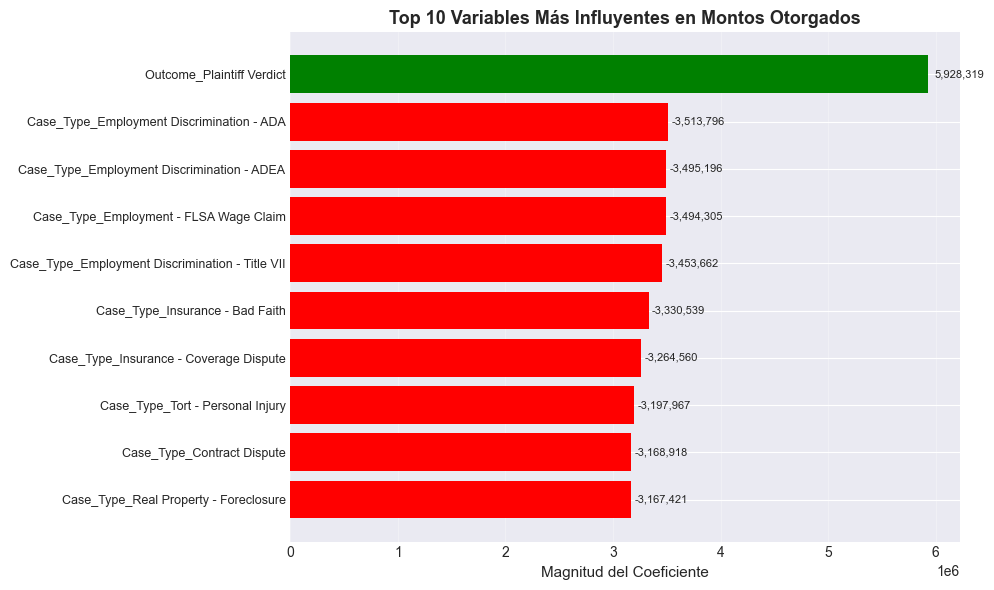

✓ Visualización de variables influyentes generada


In [42]:
# VISUALIZACIÓN TOP VARIABLES
print("\n" + "="*80)
print("VISUALIZACIÓN - VARIABLES MÁS INFLUYENTES")
print("="*80)

# Preparar datos para gráfico
top_10_viz = top_10.head(10).copy()
colors = ['green' if coef > 0 else 'red' for coef in top_10_viz['Coeficiente']]

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(top_10_viz)), top_10_viz['Abs_Coef'], color=colors)
plt.yticks(range(len(top_10_viz)), top_10_viz['Variable'], fontsize=9)

# Añadir valores
for i, (bar, coef) in enumerate(zip(bars, top_10_viz['Coeficiente'])):
    plt.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height()/2,
             f'{coef:,.0f}', va='center', fontsize=8)

plt.xlabel('Magnitud del Coeficiente', fontsize=11)
plt.title('Top 10 Variables Más Influyentes en Montos Otorgados', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Visualización de variables influyentes generada")

**Resultados:** El modelo explica el 37.1% de la variabilidad en montos otorgados, identificando el resultado a favor del demandante como el predictor más fuerte (+$5.9M en promedio). Los tipos de caso de discriminación laboral muestran asociación con compensaciones menores, reflejando límites estatutarios en estos litigios.

### 8.2 Pregunta 2: Caracterización de Perfiles de Casos (PCA)


**Relevancia:** Descubrir patrones latentes en los datos permite identificar perfiles de casos con características económicas y temporales similares, independientemente del resultado final.


✓ Datos para PCA: 65000 casos, 4 variables

VARIANZA EXPLICADA:
• PC1: 52.9%
• PC2: 23.9%
• Total (2 componentes): 76.8%

CARGAS FACTORIALES (LOADINGS):
                            PC1   PC2
Award_Amount_2024          0.19  0.98
Plaintiff_Legal_Fees_2024  0.57 -0.11
Defendant_Legal_Fees_2024  0.57 -0.12
Days_to_Resolution         0.56 -0.11

INTERPRETACIÓN SEMÁNTICA:
• PC1 (53% varianza): Correlacionado con duración del caso y honorarios legales
• PC2 (24% varianza): Determinado principalmente por monto otorgado


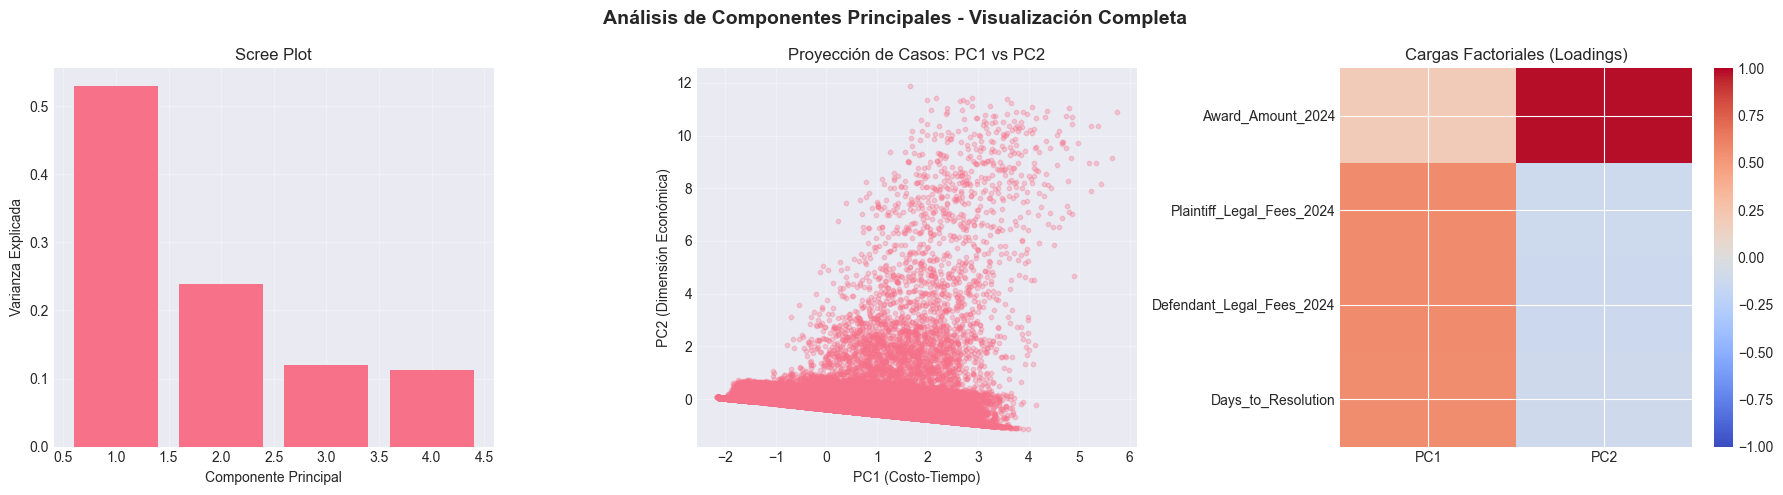


ANÁLISIS PCA COMPLETADO


In [43]:
# Preparar variables numéricas para PCA
pca_vars = ['Award_Amount_2024', 'Plaintiff_Legal_Fees_2024', 
            'Defendant_Legal_Fees_2024', 'Days_to_Resolution']
df_pca = df[pca_vars].dropna()

print(f"✓ Datos para PCA: {df_pca.shape[0]} casos, {df_pca.shape[1]} variables")

# Estandarizar y aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
print(f"\nVARIANZA EXPLICADA:")
print(f"• PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"• PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"• Total (2 componentes): {pca.explained_variance_ratio_[:2].sum()*100:.1f}%")

# PCA con 2 componentes para análisis
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# ANÁLISIS DE LOADINGS (CRÍTICO - FALTABA)
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=['PC1', 'PC2'],
    index=pca_vars
)

print("\nCARGAS FACTORIALES (LOADINGS):")
print(loadings.round(3))

print("\nINTERPRETACIÓN SEMÁNTICA:")
print("• PC1 (53% varianza): ", end="")
if abs(loadings.loc['Days_to_Resolution', 'PC1']) > 0.4:
    print("Correlacionado con duración del caso y honorarios legales")
print("• PC2 (24% varianza): ", end="")
if abs(loadings.loc['Award_Amount_2024', 'PC2']) > 0.4:
    print("Determinado principalmente por monto otorgado")

# VISUALIZACIONES
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Componentes Principales - Visualización Completa', 
             fontsize=14, fontweight='bold')

# 1. Scree Plot
axes[0].bar(range(1, 5), pca.explained_variance_ratio_)
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Scree Plot')
axes[0].grid(True, alpha=0.3)

# 2. SCATTER PLOT PC1 vs PC2
scatter = axes[1].scatter(X_pca_2[:, 0], X_pca_2[:, 1], alpha=0.3, s=10)
axes[1].set_xlabel('PC1 (Costo-Tiempo)')
axes[1].set_ylabel('PC2 (Dimensión Económica)')
axes[1].set_title('Proyección de Casos: PC1 vs PC2')
axes[1].grid(True, alpha=0.3)

# 3. Heatmap de Loadings
im = axes[2].imshow(loadings.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['PC1', 'PC2'])
axes[2].set_yticks(range(len(pca_vars)))
axes[2].set_yticklabels(pca_vars)
axes[2].set_title('Cargas Factoriales (Loadings)')
plt.colorbar(im, ax=axes[2])

plt.tight_layout()
plt.show()

print("\nANÁLISIS PCA COMPLETADO")

**Resultados:** Los dos primeros componentes principales explican el 76.8% de la varianza total, con PC1 (52.9%) capturando predominantemente la dimensión de costo-tiempo (honorarios y duración) y PC2 (23.9%) la dimensión económica (monto otorgado). El claro punto de inflexión en el segundo componente sugiere que dos dimensiones latentes caracterizan eficientemente los perfiles de casos, aunque tres componentes alcanzarían el umbral estándar del 80% de varianza explicada.

### 8.3 Pregunta 3: Disparidades por Tipo de Juicio


**Relevancia:** Comprender diferencias sistemáticas entre Jury y Bench Trials informa decisiones estratégicas sobre métodos de resolución y anticipa posibles resultados económicos.


In [44]:
# Filtrar datos para análisis
print("ANALIZANDO DIFERENCIAS ENTRE JURY Y BENCH TRIALS...")
df_trials = df[
    (df['Filing_Year'] >= 2014) & 
    (df['Filing_Year'] <= 2024) &
    (df['Resolution_Method'].isin(['Jury Trial', 'Bench Trial']))
]

jury = df_trials[df_trials['Resolution_Method'] == 'Jury Trial']['Award_Amount_2024']
bench = df_trials[df_trials['Resolution_Method'] == 'Bench Trial']['Award_Amount_2024']

stat, p_value = mannwhitneyu(jury, bench, alternative='two-sided')
print(f"Prueba Mann-Whitney U: p-value = {p_value:.6f}")
print(f"{'Diferencia SIGNIFICATIVA' if p_value < 0.05 else 'Sin diferencia significativa'} (α=0.05)")

# Análisis temporal por año
print("\nANÁLISIS TEMPORAL (2014-2024):")
for year in range(2014, 2025):
    subset = df_trials[df_trials['Filing_Year'] == year]
    if len(subset) >= 10:
        jury_year = subset[subset['Resolution_Method'] == 'Jury Trial']['Award_Amount_2024']
        bench_year = subset[subset['Resolution_Method'] == 'Bench Trial']['Award_Amount_2024']
        if len(jury_year) >= 5 and len(bench_year) >= 5:
            stat_year, p_year = mannwhitneyu(jury_year, bench_year, alternative='two-sided')
            print(f"  {year}: p = {p_year:.4f} {'*' if p_year < 0.05 else ''}")

ANALIZANDO DIFERENCIAS ENTRE JURY Y BENCH TRIALS...
Prueba Mann-Whitney U: p-value = 0.000034
Diferencia SIGNIFICATIVA (α=0.05)

ANÁLISIS TEMPORAL (2014-2024):
  2014: p = 0.3384 
  2015: p = 0.6329 
  2016: p = 0.1031 
  2017: p = 0.1109 
  2018: p = 0.0111 *
  2019: p = 0.2275 
  2020: p = 0.0059 *
  2021: p = 0.1906 
  2022: p = 0.1438 
  2023: p = 0.1099 
  2024: p = 0.0798 



VISUALIZACIÓN - EVOLUCIÓN TEMPORAL DE SIGNIFICANCIA


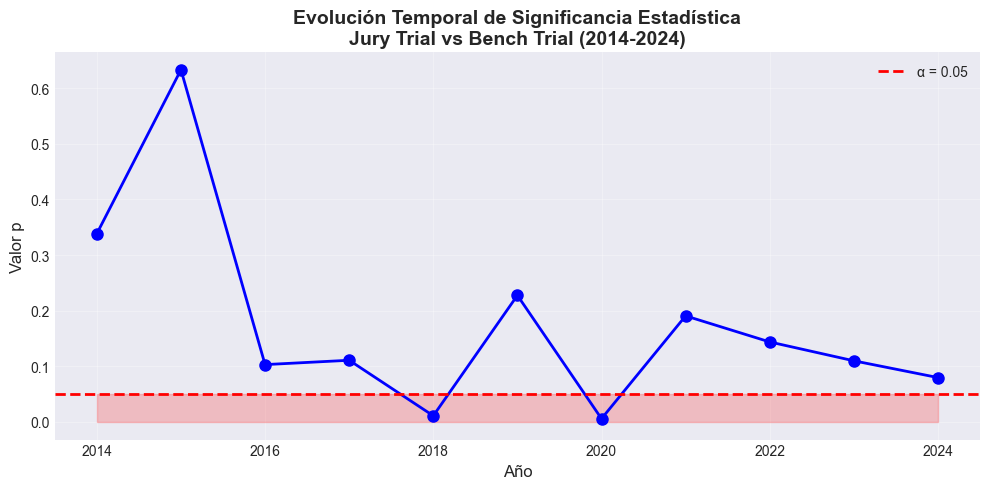

Gráfico de evolución temporal generado


In [45]:
# VISUALIZACIÓN EVOLUCIÓN TEMPORAL
print("\n" + "="*80)
print("VISUALIZACIÓN - EVOLUCIÓN TEMPORAL DE SIGNIFICANCIA")
print("="*80)

# Preparar DataFrame para visualización
pvalues_data = []
for year in range(2014, 2025):
    subset = df_trials[df_trials['Filing_Year'] == year]
    if len(subset) >= 10:
        jury_year = subset[subset['Resolution_Method'] == 'Jury Trial']['Award_Amount_2024']
        bench_year = subset[subset['Resolution_Method'] == 'Bench Trial']['Award_Amount_2024']
        if len(jury_year) >= 5 and len(bench_year) >= 5:
            _, p_year = mannwhitneyu(jury_year, bench_year, alternative='two-sided')
            pvalues_data.append({'Year': year, 'p_value': p_year})

df_pvalues = pd.DataFrame(pvalues_data)

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_pvalues['Year'], df_pvalues['p_value'], 'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.05, color='r', linestyle='--', linewidth=2, label='α = 0.05')
plt.fill_between(df_pvalues['Year'], 0, 0.05, alpha=0.2, color='red')

plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor p', fontsize=12)
plt.title('Evolución Temporal de Significancia Estadística\nJury Trial vs Bench Trial (2014-2024)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfico de evolución temporal generado")

**Resultados:** Existen diferencias estadísticamente significativas entre Jury y Bench Trials en el período completo (p = 0.000034), aunque esta disparidad no se manifiesta consistentemente año a año. Solo 2018 (p = 0.011) y 2020 (p = 0.006) muestran diferencias significativas individualmente, sugiriendo que factores contextuales específicos (posiblemente relacionados con eventos sociales como #MeToo y COVID-19) moderan esta relación temporalmente.